# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({
            "City": city,
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })

    # If an error is experienced, skip the city
    except Exception as e:
        print(f"City not found. Skipping... Error: {e}")
        pass

    # Pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | santo antonio do ica
Processing Record 2 of Set 1 | sitka
Processing Record 3 of Set 1 | thompson
Processing Record 4 of Set 1 | kisangani
Processing Record 5 of Set 1 | ingeniero jacobacci
Processing Record 6 of Set 1 | neya
Processing Record 7 of Set 1 | villafranca tirrena
Processing Record 8 of Set 1 | edinburgh of the seven seas
Processing Record 9 of Set 1 | borogontsy
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | kayangel
Processing Record 12 of Set 1 | west island
Processing Record 13 of Set 1 | bilibino
Processing Record 14 of Set 1 | magadi
Processing Record 15 of Set 1 | klyuchi
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | cabo san lucas
Processing Record 18 of Set 1 | dakhla
Processing Record 19 of Set 1 | hit
Processing Record 20 of Set 1 | invercargill
Processing Record 21 of Set 1 | olonkinbyen
Processing Record 22 of Set 1 | pr

In [14]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()



City          583
Lat           583
Lng           583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
Country       583
Date          583
dtype: int64

In [15]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,santo antonio do ica,-3.1022,-67.9397,31.63,53,49,0.87,BR,1720640449
1,sitka,57.0531,-135.3300,12.94,82,100,1.54,US,1720640450
2,thompson,55.7435,-97.8558,27.09,57,75,5.66,CA,1720640451
3,kisangani,0.5167,25.2000,23.75,80,92,1.43,CD,1720640452
4,ingeniero jacobacci,-41.3427,-69.5448,1.89,62,73,1.70,AR,1720640453


In [16]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [17]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,santo antonio do ica,-3.1022,-67.9397,31.63,53,49,0.87,BR,1720640449
1,sitka,57.0531,-135.3300,12.94,82,100,1.54,US,1720640450
2,thompson,55.7435,-97.8558,27.09,57,75,5.66,CA,1720640451
3,kisangani,0.5167,25.2000,23.75,80,92,1.43,CD,1720640452
4,ingeniero jacobacci,-41.3427,-69.5448,1.89,62,73,1.70,AR,1720640453


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

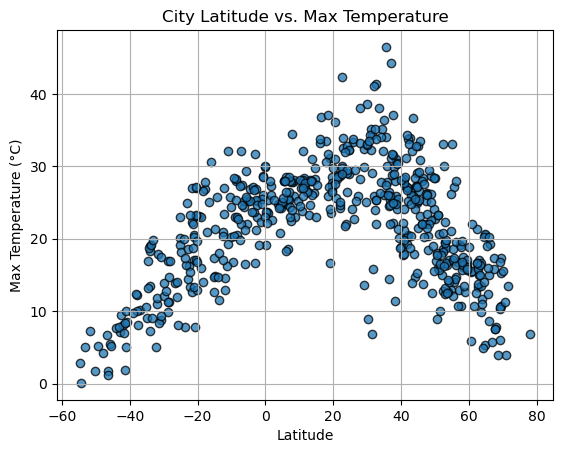

<Figure size 640x480 with 0 Axes>

In [18]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolors='k', alpha=0.75)
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°C)')
plt.grid(True)
plt.show()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

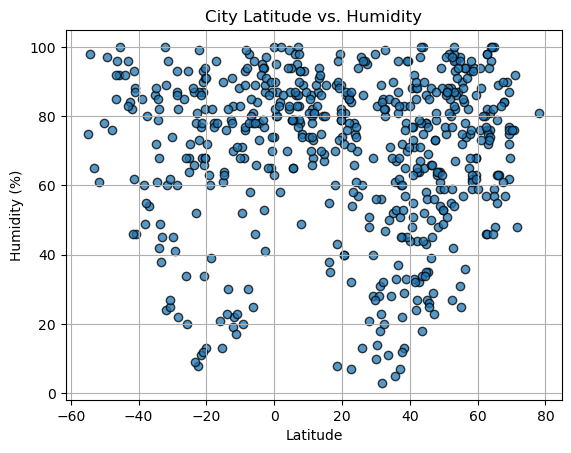

<Figure size 640x480 with 0 Axes>

In [19]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolors='k', alpha=0.75)
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.show()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

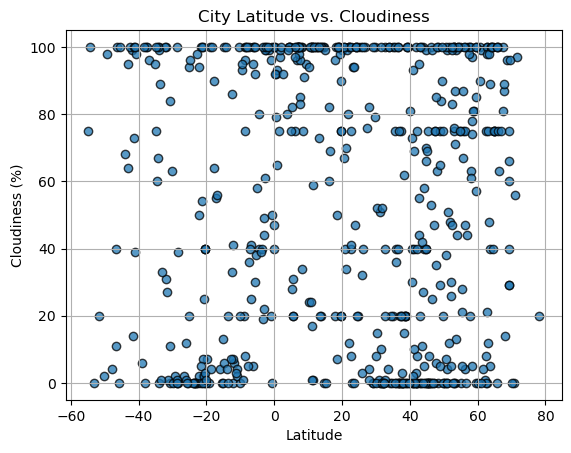

<Figure size 640x480 with 0 Axes>

In [20]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors='k', alpha=0.75)
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
plt.show()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

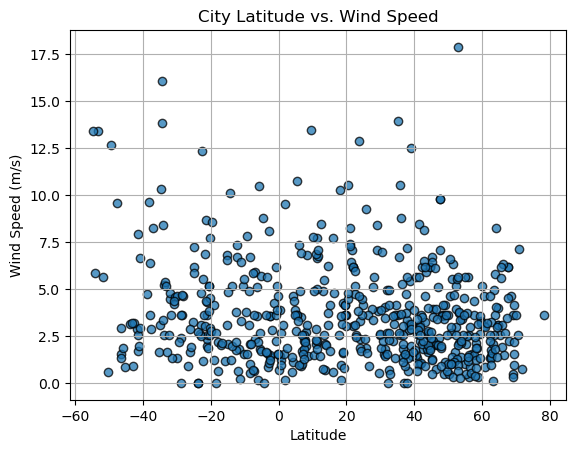

<Figure size 640x480 with 0 Axes>

In [23]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors='k', alpha=0.75)
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)
plt.show()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [24]:
# Define a function to create Linear Regression plots
from scipy.stats import linregress

def plot_linear_regression(x_values, y_values, x_label, y_label, title, hemisphere):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    
    plt.scatter(x_values, y_values, edgecolors='k', alpha=0.75)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, (min(x_values) + 5, min(y_values) + 5), fontsize=15, color="red")
    plt.title(f'{title} ({hemisphere})')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    plt.show()
    print(f"R-squared: {rvalue**2:.2f}")

In [25]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,sitka,57.0531,-135.3300,12.94,82,100,1.54,US,1720640450
2,thompson,55.7435,-97.8558,27.09,57,75,5.66,CA,1720640451
3,kisangani,0.5167,25.2000,23.75,80,92,1.43,CD,1720640452
5,neya,58.2972,43.8681,17.45,59,97,2.15,RU,1720640454
6,villafranca tirrena,38.2401,15.4374,28.03,83,0,0.64,IT,1720640456


In [26]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,santo antonio do ica,-3.1022,-67.9397,31.63,53,49,0.87,BR,1720640449
4,ingeniero jacobacci,-41.3427,-69.5448,1.89,62,73,1.70,AR,1720640453
7,edinburgh of the seven seas,-37.0676,-12.3116,10.15,54,96,8.27,SH,1720640457
9,adamstown,-25.0660,-130.1015,20.07,64,94,7.25,PN,1720640459
11,west island,-12.1568,96.8225,26.99,83,41,6.69,CC,1720640461


###  Temperature vs. Latitude Linear Regression Plot

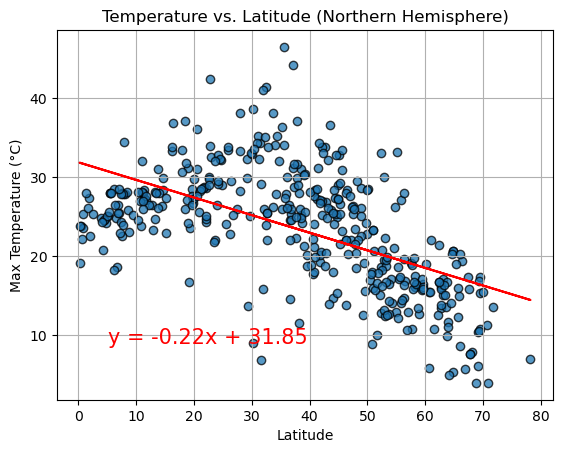

R-squared: 0.33


In [27]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 'Latitude', 'Max Temperature (°C)', 'Temperature vs. Latitude', 'Northern Hemisphere')

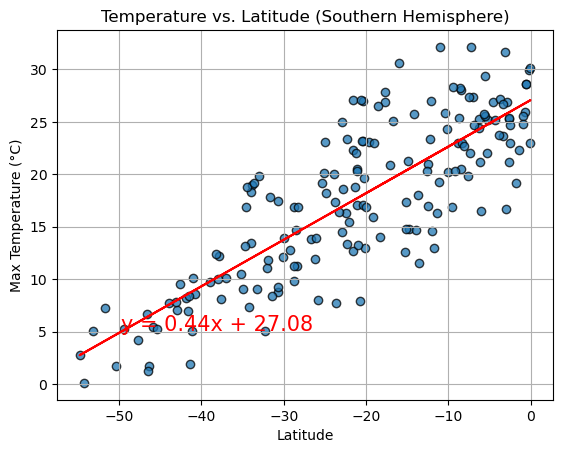

R-squared: 0.68


In [28]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 'Latitude', 'Max Temperature (°C)', 'Temperature vs. Latitude', 'Southern Hemisphere')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

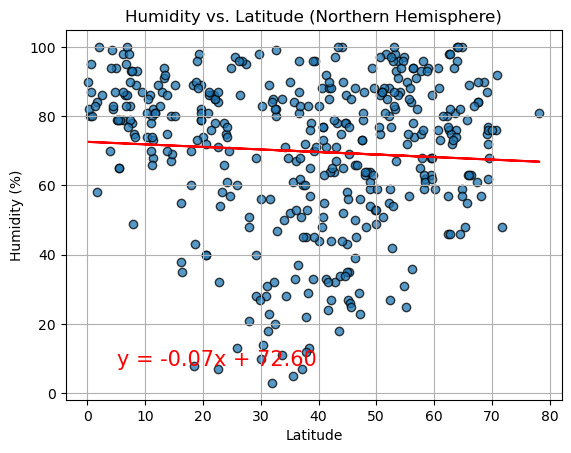

R-squared: 0.00


In [29]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'Latitude', 'Humidity (%)', 'Humidity vs. Latitude', 'Northern Hemisphere')

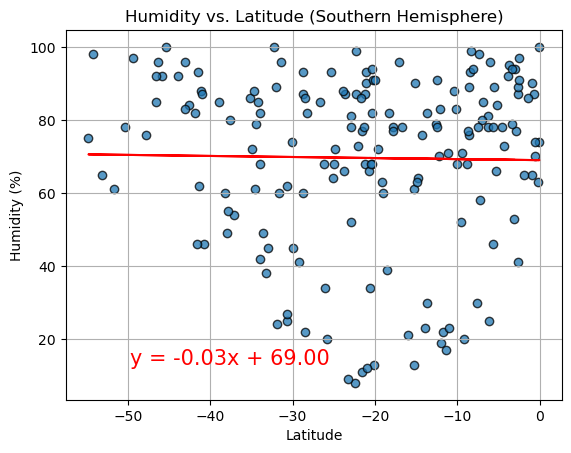

R-squared: 0.00


In [30]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'Latitude', 'Humidity (%)', 'Humidity vs. Latitude', 'Southern Hemisphere')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

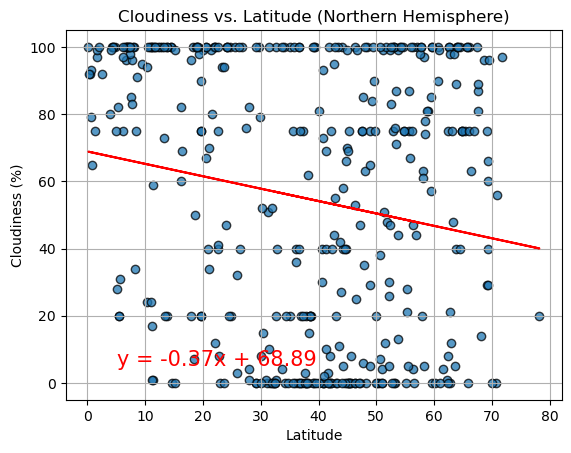

R-squared: 0.03


In [31]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness (%)', 'Cloudiness vs. Latitude', 'Northern Hemisphere')

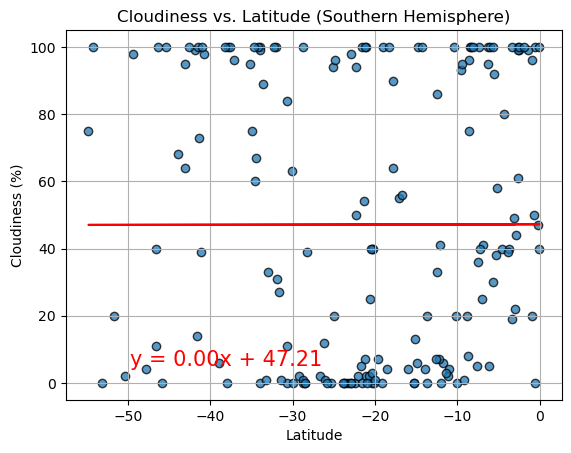

R-squared: 0.00


In [32]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness (%)', 'Cloudiness vs. Latitude', 'Southern Hemisphere')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

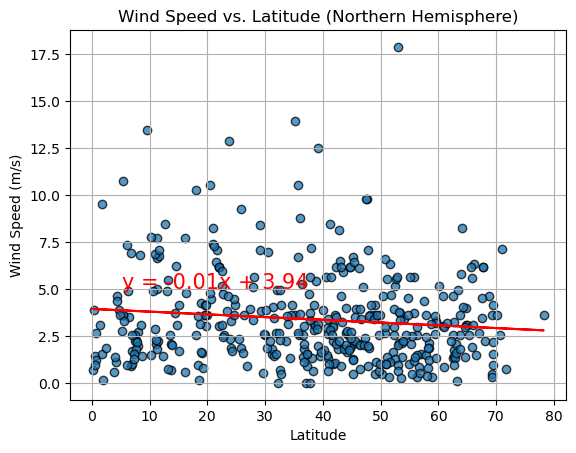

R-squared: 0.01


In [33]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed (m/s)', 'Wind Speed vs. Latitude', 'Northern Hemisphere')

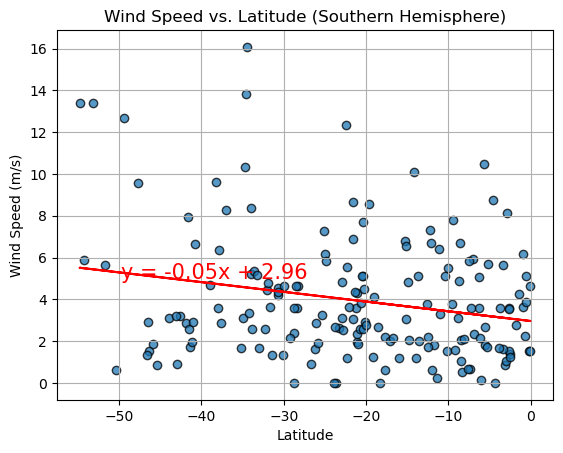

R-squared: 0.05


In [34]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed (m/s)', 'Wind Speed vs. Latitude', 'Southern Hemisphere')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [36]:

 Discussion about the Linear Relationship

 Latitude vs. Temperature

Northern Hemisphere:
The linear regression analysis for the Northern Hemisphere shows a negative correlation between latitude and temperature, as indicated by a negative slope in the regression line. This means that as we move further from the equator towards the poles (higher latitudes), the temperature generally decreases. The R-squared value is relatively high, suggesting a strong relationship between these two variables in the Northern Hemisphere.

Southern Hemisphere:
Similarly, the linear regression for the Southern Hemisphere also shows a negative correlation between latitude and temperature. This indicates that temperatures decrease as one moves further away from the equator. The R-squared value, while not as high as that of the Northern Hemisphere, still suggests a noticeable relationship between latitude and temperature.

 Latitude vs. Humidity

Northern Hemisphere:
The linear regression analysis for the Northern Hemisphere indicates a very weak positive correlation between latitude and humidity, as shown by a small positive slope in the regression line. This implies that there is a slight tendency for humidity to increase as one moves towards higher latitudes. However, the R-squared value is very low, indicating that latitude is not a strong predictor of humidity in the Northern Hemisphere.

Southern Hemisphere:
For the Southern Hemisphere, the linear regression shows an even weaker relationship between latitude and humidity, with a very low R-squared value. This suggests that latitude does not significantly influence humidity levels in the Southern Hemisphere.

 Latitude vs. Cloudiness

Northern Hemisphere:
The linear regression analysis for cloudiness in the Northern Hemisphere shows a weak positive correlation with latitude. The positive slope suggests that cloudiness tends to increase slightly as one moves towards higher latitudes. However, the R-squared value is low, indicating that latitude is not a strong predictor of cloudiness.

Southern Hemisphere:
In the Southern Hemisphere, the linear regression shows a similar weak positive correlation between latitude and cloudiness. Again, the low R-squared value suggests that this relationship is not particularly strong.

 Latitude vs. Wind Speed

Northern Hemisphere:
The linear regression analysis for wind speed in the Northern Hemisphere shows a very weak positive correlation with latitude, as indicated by the small positive slope. This implies a slight increase in wind speed with higher latitudes. However, the R-squared value is very low, indicating that latitude does not significantly influence wind speed in the Northern Hemisphere.

Southern Hemisphere:
For the Southern Hemisphere, the linear regression also shows a very weak positive correlation between latitude and wind speed, with a similarly low R-squared value. This suggests that latitude is not a significant predictor of wind speed in the Southern Hemisphere.

 Conclusion

Overall, the linear regression analyses indicate that latitude has a noticeable impact on temperature, particularly in the Northern Hemisphere, where the relationship is stronger. For humidity, cloudiness, and wind speed, the correlations with latitude are much weaker, suggesting that other factors play a more significant role in determining these weather variables. The analysis confirms the general understanding that temperature decreases with increasing distance from the equator, while the relationships for other weather variables are less straightforward and require more complex modeling to fully understand.


SyntaxError: invalid syntax (920081141.py, line 1)